# Dataset Installization & Pips

In [ ]:
!pip install ir_datasets

In [ ]:
pip install inflect

In [ ]:
pip install sentence-transformers

In [ ]:
!pip install langchain-community

In [ ]:
pip install chromadb

In [2]:
import ir_datasets
dataset = ir_datasets.load("lotte/science/dev/forum")

In [ ]:
for doc in dataset.docs_iter():
    doc
    break

# Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Imports


In [16]:
import nltk
import pandas as pd
import math
import string
import numpy as np


from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Classes

In [ ]:
class GenericDoc:
  def __init__(self, doc_id, text):
    self.doc_id = doc_id
    self.text = text

  def __str__(self):
    return f"GenericDoc(doc_id:'{self.doc_id}', text:\" {self.text}\")"

  def key(self):
    return self.doc_id

  def value(self):
    return self.text

#Methods

##Stop Words

In [ ]:
def remove_stop_words(doc_id,words):
  res=[]
  for word in words:
   word = word.replace(" ", "")
   if word not in stopwords.words('english') and word:
      res.append(word)
  return res

## Unknown Words

In [ ]:
def remove_unknown_words(words):
  res = []
  spell = SpellChecker()
  misspelled = spell.unknown(words)
  for word in words:
    if word not in misspelled:
      res.append(word)
  return res

##Stemming

In [ ]:
def stemming(words):
  stemming_words =[]
  stemmer = PorterStemmer()
  for word in words:
    temp = stemmer.stem(word)
    if len(temp) > 1:
      stemming_words.append(temp)
    else:
      if temp.isnumeric():
       stemming_words.append(temp)

  return stemming_words

## POS

In [ ]:
def get_wordnet_pos(tag_parameter):

    tag = tag_parameter[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

##Lemmatization

In [ ]:
def lemmatization(words,pos_tags):

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
  return lemmatized_words

## Regex

In [ ]:
import re

In [ ]:
def remove_special_characters(words): # Word Level
    res = []
    for word in words:
        cleaned_word = re.sub(r'[^A-Za-z0-9]+', '', word)
        res.append(cleaned_word)
    return res

In [ ]:
def ARSC(text): # Document Level
  return re.sub(r'[^A-Za-z0-9]+', ' ', text)

## Numbers To Words

In [ ]:
from dataclasses import replace
import inflect

def numberToWord(words):
    p = inflect.engine()
    res = []
    for word in words:
        try:
            if word.isnumeric():
                word = p.number_to_words(int(word), decimal=" ", andword=" ")
                word = re.sub(r' ','_',word)
                res.append(word)
            else:
                res.append(word)
        except Exception as e:
            pass
    return res


# Storing

In [4]:
import pickle

def save(vectorizer, path):
    with open(path, "wb") as f:
        pickle.dump(vectorizer, f)

def load(path):
    with open(path, "rb") as f:
        return pickle.load(f)

# Text Processing

In [ ]:
stop_words = set(stopwords.words('english'))
def process(document):

    doc_id, doc = document

    # Lower
    doc = doc.lower().strip()

    #ARSC
    doc = ARSC(doc)

    # Tokenize into words
    words = word_tokenize(doc)

    # POS
    pos = pos_tag(words)

    # Stop Words
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    words = lemmatization(words,pos)

    # Stemming
    words = stemming(words)

    # Number To Word
    words = numberToWord(words)

    return doc_id, ' '.join(words)


# Clean Data

## Train


In [ ]:
cleand_data= []
data_names= []

In [ ]:
def clean(docs):
  temp_data = []
  temp_names = []
  for doc in docs:
    name, res = process(doc)
    temp_names.append(doc.doc_id)
    temp_data.append(res)
  data_names.extend(temp_names)
  cleand_data.extend(temp_data)

In [ ]:
clean(dataset.docs_iter()[:34364])

In [ ]:
clean(dataset.docs_iter()[34364:68728])

In [ ]:
clean(dataset.docs_iter()[68728:103092])

In [ ]:
clean(dataset.docs_iter()[103092:137456])

In [ ]:
clean(dataset.docs_iter()[137456:171820])

In [ ]:
clean(dataset.docs_iter()[171820:206184])

In [ ]:
clean(dataset.docs_iter()[206184:240548])

In [ ]:
clean(dataset.docs_iter()[240548:274912])

In [ ]:
clean(dataset.docs_iter()[274912:309276])

In [ ]:
clean(dataset.docs_iter()[309276:343640])

In [ ]:
clean(dataset.docs_iter()[343640:343642])

In [ ]:
save(cleand_data, "/content/drive/My Drive/IR/lotte/cleand_data.pkl")
save(data_names,"/content/drive/My Drive/IR/lotte/data_names.pkl")

## Load Clean Data

In [ ]:
cleand_data = load("/content/drive/My Drive/IR/lotte/cleand_data.pkl")
data_names = load("/content/drive/My Drive/IR/lotte/data_names.pkl")

In [ ]:
lotte_queries = []
for id , query in dataset.queries_iter():
  lotte_queries.append(query)

save(lotte_queries, "/content/drive/My Drive/IR/lotte/lotte_queries.pkl")

# Qrels

In [5]:
qrels = []
for q in dataset.qrels_iter():
  qrels.append(q)

# Evaluation Methods


In [6]:
def calculate_relevant_count( retrieved_docs, query_docs):
    intersect_values = np.intersect1d(retrieved_docs, query_docs)
    matched_count = len(intersect_values)
    return matched_count

In [7]:
def getDocsByQid(qrels, queryId):
    relevant_docs = []
    flag: bool = False
    for qid, doc_id, relevance, iteration in qrels:
        if qid == queryId:
            flag = True
            relevant_docs.append(doc_id)
        elif flag:
            break;
        else:
            continue
    return relevant_docs

In [8]:
def average_precision(retrieved_docs, relevant_docs, k=10):
    total_precisions = 0
    curr_relavant = 1
    if len(relevant_docs) == 0:
        return 0
    if len(retrieved_docs) <= k:
        k = len(retrieved_docs)
    for i in range(k):
        if retrieved_docs[i] in relevant_docs:
            total_precisions += curr_relavant / (i + 1)
            curr_relavant += 1
    matched = calculate_relevant_count(retrieved_docs[:k], relevant_docs)

    if matched == 0:
        return 0
    return total_precisions / matched

In [9]:
def calculate_map( queries, qrles):
    total_ap = 0
    for query_id, docs in queries.items():
      retrieved_docs= queries.get(query_id)[:10]
      relevant_docs=getDocsByQid(qrels,query_id)
      avg= average_precision(retrieved_docs, relevant_docs)
      total_ap += avg

    map_score = total_ap / len(queries)
    return map_score

In [10]:
def get_first_matched_position(qrles, queries):
    for query_id in queries:
        docs_list = queries[query_id]
        queries[query_id] = docs_list[:10]
    matched_positions = {}
    for query_id in queries:
        matched_positions[query_id] = -1
        for i, doc in enumerate(queries[query_id]):
            if doc in getDocsByQid(qrles,query_id):
                matched_positions[query_id] = i
                break
    return matched_positions

In [11]:
def mean_reciprocal_rank(qrels, queries):
    matched_positions = get_first_matched_position(qrels, queries)
    total_rr = 0
    for query_id, matched_position in matched_positions.items():
        if matched_position == -1:
            total_rr += 0
            continue
        total_rr += (1 / (int(matched_position) + 1))
    mrr = (total_rr) * (1 / len(qrels))
    return mrr

In [12]:
def precisionAtTen(query_id, queries):
    retrieved_docs= queries.get(query_id)[:10]
    relevant_docs=getDocsByQid(qrels,query_id)
    number_of_relevant_docs = calculate_relevant_count(retrieved_docs, relevant_docs)
    precision = number_of_relevant_docs / 10
    return precision

In [13]:
def recall(query_id, queries, k = 0):
  if(k==0):
    retrieved_docs= queries.get(query_id)
  else:
    retrieved_docs= queries.get(query_id)[:k]

  relevant_docs=getDocsByQid(qrels,query_id)
  number_of_relevant_docs = calculate_relevant_count(retrieved_docs, relevant_docs)
  recall_value = number_of_relevant_docs / len(relevant_docs)
  return recall_value

# Vectorizer & TFIDF Matrix


## ReCalculate Values

In [ ]:
# vectorizer
vectorizer = TfidfVectorizer(
    # max_df = 0.2,
    # min_df = 1
)



# TFIDF Matrix
tfidf_matrix = vectorizer.fit_transform(cleand_data)


# Saving
save(vectorizer, "/content/drive/My Drive/IR/lotte/vectorizer.pkl")
save(tfidf_matrix, "/content/drive/My Drive/IR/lotte/tfidf_matrix.pkl")


## Load Calculated Values

In [ ]:
# Loading
vectorizer = load("/content/drive/My Drive/IR/lotte/vectorizer.pkl")
tfidf_matrix = load("/content/drive/My Drive/IR/lotte/tfidf_matrix.pkl")

## Matching

### Basic Match

In [ ]:
import numpy as np
def match_query(query):
    query_tfidf = vectorizer.transform([query])
    query_vector = query_tfidf.toarray()[0]
    similarity = cosine_similarity(query_vector.reshape(1, -1), tfidf_matrix).flatten()
    sorted_indices = np.argsort(similarity)[::-1]
    sorted_documents = [(data_names[i]) for i in sorted_indices if similarity[i] > 0]
    return sorted_documents

### Match with Length Normaliztion

In [ ]:
doc_lengths =[]
for data in cleand_data:
  doc_lengths.append(len(data))

len(doc_lengths)

343642

In [ ]:
import numpy as np
def match_query_length_normalization(query):
    query_tfidf = vectorizer.transform([query])
    query_vector = query_tfidf.toarray()[0]
    similarity = cosine_similarity(query_vector.reshape(1, -1), tfidf_matrix).flatten()
    normalized_similarity = np.array([sim * length if length > 0 else 0 for sim, length in zip(similarity, doc_lengths)])
    sorted_indices = np.argsort(normalized_similarity)[::-1]  # Reverse the indices for descending sort
    sorted_documents = [(data_names[i]) for i in sorted_indices[:10] if similarity[i] > 0]

    return sorted_documents

## Query Results

### Calculate & Save

In [ ]:
query_results = {}
i=0
for query in dataset.queries_iter():
    i+=1
    print(i)
    query_name, cleaned_query = process(query)
    result_value = match_query(cleaned_query)
    query_results[query_name] = result_value

save(query_results, "/content/drive/My Drive/IR/lotte/query_results.pkl")

### Load

In [14]:
query_results = load("/content/drive/My Drive/IR/lotte/query_results.pkl")

# Word Embeding

## Word2Vec

In [ ]:
import numpy as np

def get_embedding_vector(model, doc_tokens, size=300):
    if not doc_tokens:
        return np.zeros(size)

    embeddings = []
    for tok in doc_tokens:
        if tok in model.wv:
            embeddings.append(model.wv[tok])
        else:
            embeddings.append(np.zeros(size))

    if embeddings:
        embeddings = np.asarray(embeddings)
        vector = np.mean(embeddings, axis=0)
    else:
        return np.zeros(size)

    return vector


### Train

In [ ]:
from nltk.tokenize import word_tokenize
import numpy as np

tokenized_documents = [word_tokenize(doc) for doc in cleand_data if isinstance(doc, str)]


In [ ]:
from gensim.models import Word2Vec

vector_size = 300
epochs = 20
workers = 2


print('training word2vec')
model = Word2Vec(tokenized_documents, vector_size=vector_size, sg=1, workers=workers, epochs=epochs)

print('storing word2vec model')
model.save("/content/drive/My Drive/IR/lotte/wbModel.pkl")



In [ ]:
print('calculating document vectors')
document_vectors = [get_embedding_vector(model, doc_tokens) for doc_tokens in tokenized_documents]

print('storing documents vectors')
save(document_vectors, "/content/drive/My Drive/IR/lotte/document_vectors.pkl")
print('training model has ended')

calculating document vectors
storing documents vectors
training model has ended


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec.load("/content/drive/My Drive/IR/lotte/wbModel.pkl")
document_vectors = load("/content/drive/My Drive/IR/lotte/document_vectors.pkl")

### Matching

In [ ]:
def WEmatchingAndRanking(query):
    retrived = []
    # Tokenize
    query_tokens = word_tokenize(query)

    # Query Embedding Vector
    query_vector = get_embedding_vector(model, query_tokens)

    # Cosine Similarity
    similarity_scores =  cosine_similarity([query_vector], document_vectors)[0]

    # Sort By Similarity
    sorted_docs = np.argsort(similarity_scores)[::-1]

    # Get Top 10 Answers
    retrived = [(data_names[i]) for i in sorted_docs[:10]]

    return retrived

### Query Results

In [ ]:
import re
WE_query_results = {}

for query in dataset.queries_iter():
    query_name, cleaned_query = process(query)
    result_value = WEmatchingAndRanking(cleaned_query)
    WE_query_results[query_name] = result_value

save(WE_query_results, "/content/drive/My Drive/IR/lotte/WE_query_results.pkl")

### W2V Map

In [ ]:
Map = calculate_map(WE_query_results, qrels)
Map

0.14159764488121224

## Hugging Face Embedding

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
model = "sentence-transformers/multi-qa-MiniLM-L6-cos-v1"
embeddings = HuggingFaceEmbeddings(
    model_name=model,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
    show_progress="true"
)

In [ ]:
embeddings_list = []

In [ ]:
embeddings_list.extend(embeddings.embed_documents(cleand_data))

In [ ]:
save(embeddings_list, "/content/drive/My Drive/IR/lotte/Lembeddings_list.pkl")

### Load

In [ ]:
embeddings_list = load("/content/drive/My Drive/IR/lotte/Lembeddings_list.pkl")

# Vector Store

## Chroma

In [ ]:
import chromadb
chroma_client = chromadb.Client()

In [ ]:
# chroma_client.delete_collection(name="lotte")
collection = chroma_client.create_collection(name="lotte")

In [ ]:
# Split your data into smaller batches
batch_size = 1000  # Adjust this based on your specific data size
num_documents = len(cleand_data)  # Replace with the actual number of documents

for i in range(0, num_documents, batch_size):
    batch_data = cleand_data[i : i + batch_size]
    batch_names = data_names[i : i + batch_size]
    batch_embeddings = embeddings_list[i : i + batch_size]

    # Add the batch to the collection
    collection.add(
        documents=batch_data,
        ids=batch_names,
        embeddings=batch_embeddings
    )

## Matching & Ranking

In [ ]:
def matchingAndRanking(query):
  query_embedding_list = embeddings.embed_query(query)
  results = collection.query(
      query_embeddings=query_embedding_list,
      n_results=150,
  )
  return results["ids"][0]

## Queries Results

In [ ]:
lang_query_results = {}

for query_name, query in dataset.queries_iter():
    result_value = matchingAndRanking(query)
    lang_query_results[query_name] = result_value

save(lang_query_results, "/content/drive/My Drive/IR/lotte/lang_query_results.pkl")

### Load

In [18]:
lang_query_results = load("/content/drive/My Drive/IR/lotte/lang_query_results.pkl")

# Metrics Without Word embedding

## Recall

In [ ]:
queries_recall = []

for id, query in dataset.queries_iter():
  queries_recall.append(recall(id, query_results))


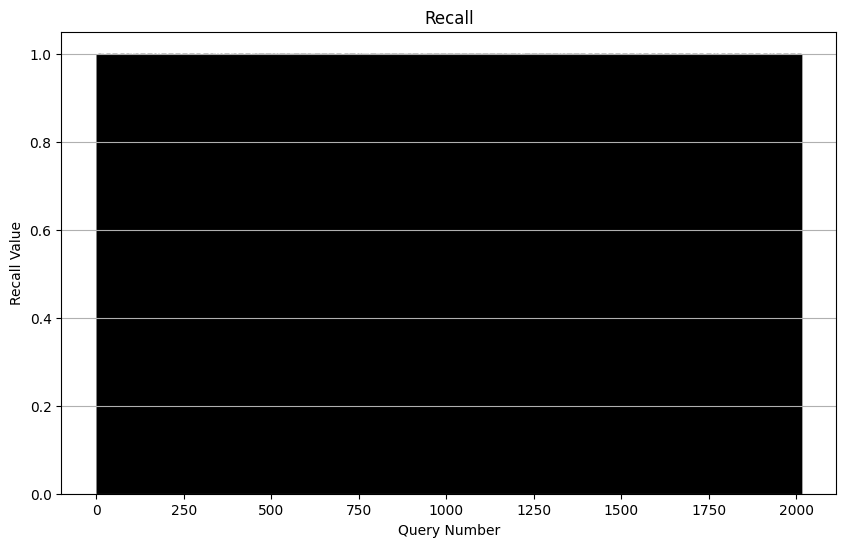

In [ ]:
import matplotlib.pyplot as plt
queries = range(1, len(queries_recall)+1)

plt.figure(figsize=(10, 6))
plt.bar(queries, queries_recall, color='skyblue', edgecolor='black')
plt.xlabel('Query Number')
plt.ylabel('Recall Value')
plt.title('Recall')
plt.grid(axis='y')
plt.show()


## Precision@10

In [ ]:
queries_PrecisionTen= []
for id, query in dataset.queries_iter():
  queries_PrecisionTen.append(precisionAtTen(id, query_results))

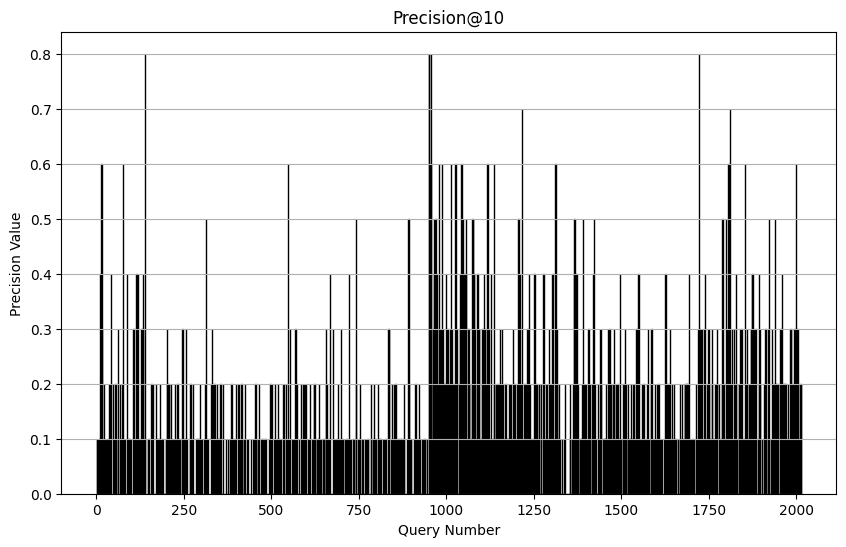

In [ ]:
import matplotlib.pyplot as plt
queries = range(1, len(queries_recall)+1)

plt.figure(figsize=(10, 6))
plt.bar(queries, queries_PrecisionTen, color='skyblue', edgecolor='black')
plt.xlabel('Query Number')
plt.ylabel('Precision Value')
plt.title('Precision@10')
plt.grid(axis='y')
plt.show()

## MAP

In [17]:
Map = calculate_map(query_results, qrels)
Map

0.2267039395103408

## MRR

In [ ]:
MRR = mean_reciprocal_rank(qrels, query_results)
MRR

0.04089817520467017

# Metrics With Word embedding

## Recall

In [ ]:
queries_recall = []

for id, query in dataset.queries_iter():
  queries_recall.append(recall(id, lang_query_results))


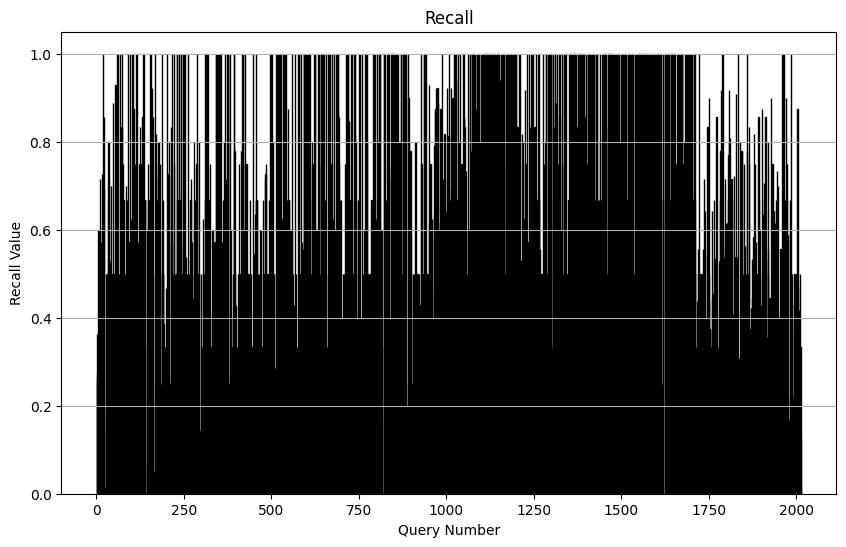

In [ ]:
import matplotlib.pyplot as plt
queries = range(1, len(queries_recall)+1)

plt.figure(figsize=(10, 6))
plt.bar(queries, queries_recall, color='skyblue', edgecolor='black')
plt.xlabel('Query Number')
plt.ylabel('Recall Value')
plt.title('Recall')
plt.grid(axis='y')
plt.show()

## Precision@10

In [ ]:
queries_PrecisionTen= []
for id, query in dataset.queries_iter():
  queries_PrecisionTen.append(precisionAtTen(id, lang_query_results))

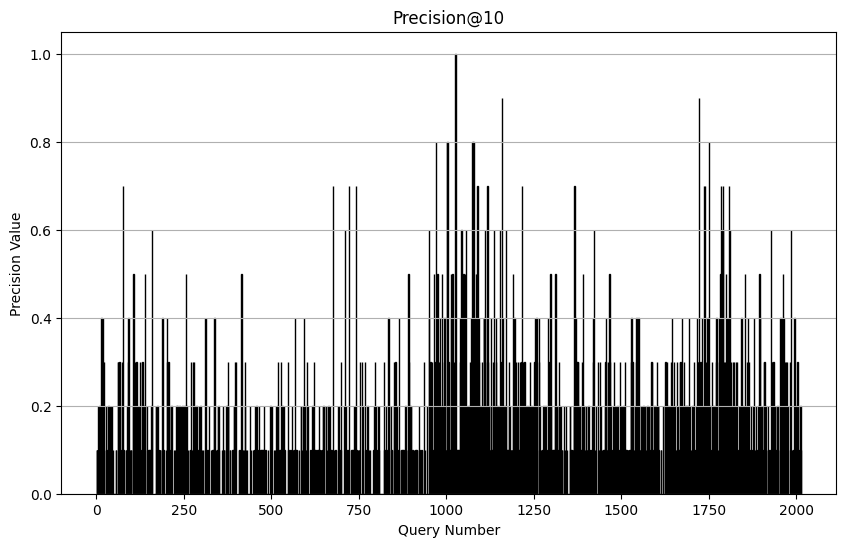

In [ ]:
import matplotlib.pyplot as plt
queries = range(1, len(queries_recall)+1)

plt.figure(figsize=(10, 6))
plt.bar(queries, queries_PrecisionTen, color='skyblue', edgecolor='black')
plt.xlabel('Query Number')
plt.ylabel('Precision Value')
plt.title('Precision@10')
plt.grid(axis='y')
plt.show()

## Map

In [20]:
Map = calculate_map(lang_query_results, qrels)
Map

0.2889596113233241

## MRR

In [ ]:
MRR = mean_reciprocal_rank(qrels, lang_query_results)
MRR

0.053001107269300546